## preamble

In [1]:
SetDirectory["~/Documents/Univ/StocForm_for_Gauge/num"];

In [2]:
SetOptions[{Plot,LogPlot,LogLinearPlot,LogLogPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3]}];
SetOptions[{ListPlot,ListLogPlot,ListLogLinearPlot,ListLogLogPlot},
           {ImageSize->Large,
            Frame->True, 
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3],
            Joined->True}];
SetOptions[{ParametricPlot3D},
           {ImageSize->Large
           ,LabelStyle->Directive[Black,Large,FontFamily->"Palatino"]
           ,PlotStyle->AbsoluteThickness[3]}];
RGBData = {"#5E81B5","#E19C24","#8FB032","#EB6235","#8778B3","#C56E1A","#5D9EC7","#FFBF00","#A5609D","#929600","#E95536","#6685D9","#F89F13","#BC5B80","#47B66D"};
Color = Map[RGBColor,RGBData];

## 3D simulation

2
W      W Wp

         2
W Wp   Wp
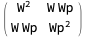

In [115]:
Mmatrix = {{W^2,W Wp},{W Wp,Wp^2}}; Mmatrix // MatrixForm

Wp                W
-(--------------)   --------------
        2     2           2     2
  Sqrt[W  + Wp ]    Sqrt[W  + Wp ]

      W                   Wp
--------------      --------------
      2     2             2     2
Sqrt[W  + Wp ]      Sqrt[W  + Wp ]
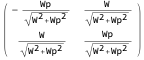

In [116]:
Rmatrix = 1/Sqrt[W^2+Wp^2] DiagonalMatrix[{W,Wp}].Eigenvectors[Mmatrix]; Rmatrix // MatrixForm

In [117]:
Rmatrix.Mmatrix.Transpose[Rmatrix] // Simplify

2     2
{{0, 0}, {0, W  + Wp }}

In [118]:
Rmatrix = 1/Sqrt[W^2+Wp^2] {{Wp,-W},{W,Wp}};
Rmatrix.Mmatrix.Transpose[Rmatrix] // Simplify

2     2
{{0, 0}, {0, W  + Wp }}

In [7]:
WW[x_,kp_] = WhittakerW[-I x,1/2,-2I kp];
Wp[x_,kp_] = D[WW[x,kp],kp] // Simplify;

In [9]:
Arg[I]

Pi
--
2

-Graphics-
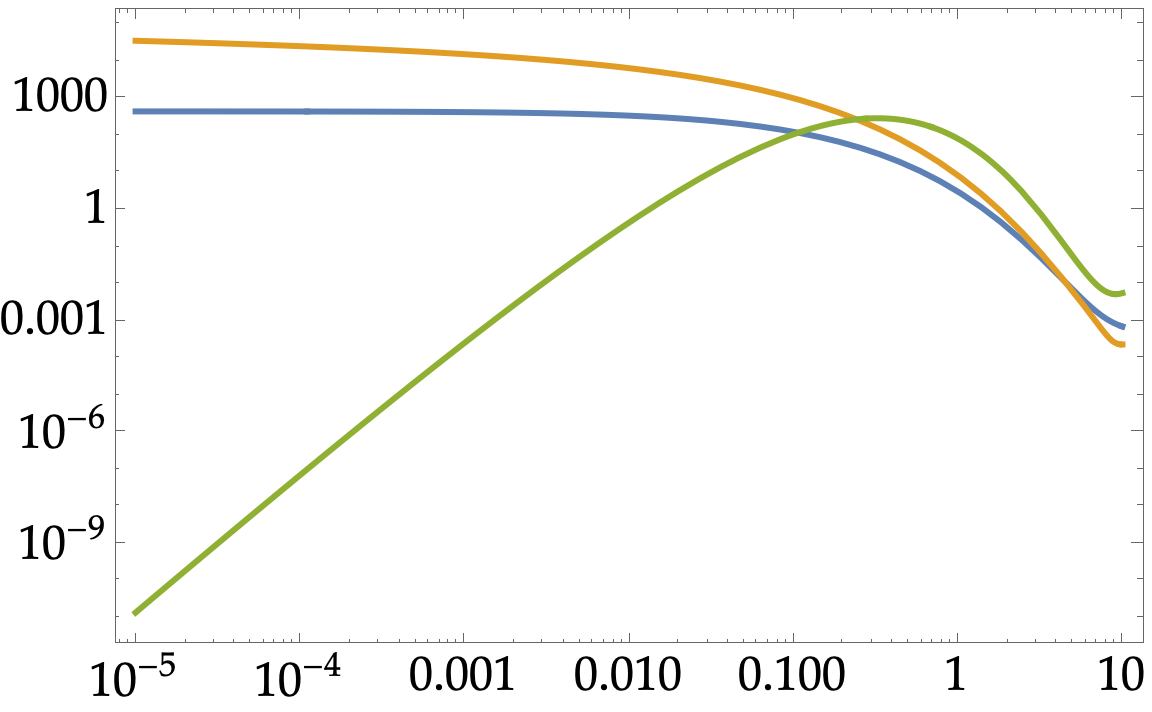

In [10]:
LogLogPlot[{Abs[WW[5,kp]],Abs[Wp[5,kp]],kp^4(Abs[WW[5,kp]]^2+Abs[Wp[5,kp]]^2)},{kp,10^-5,10}]

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[1.6], Dashing[{Small, Small}]]}, {W, W'}, 
 
>     LegendMarkers -> None, LabelStyle -> 
 
>      Directive[GrayLevel[0], Large, FontFamily -> Palatino], LegendLayout -> Column], 
 
>    {0.2, 0.2}, Identity]]
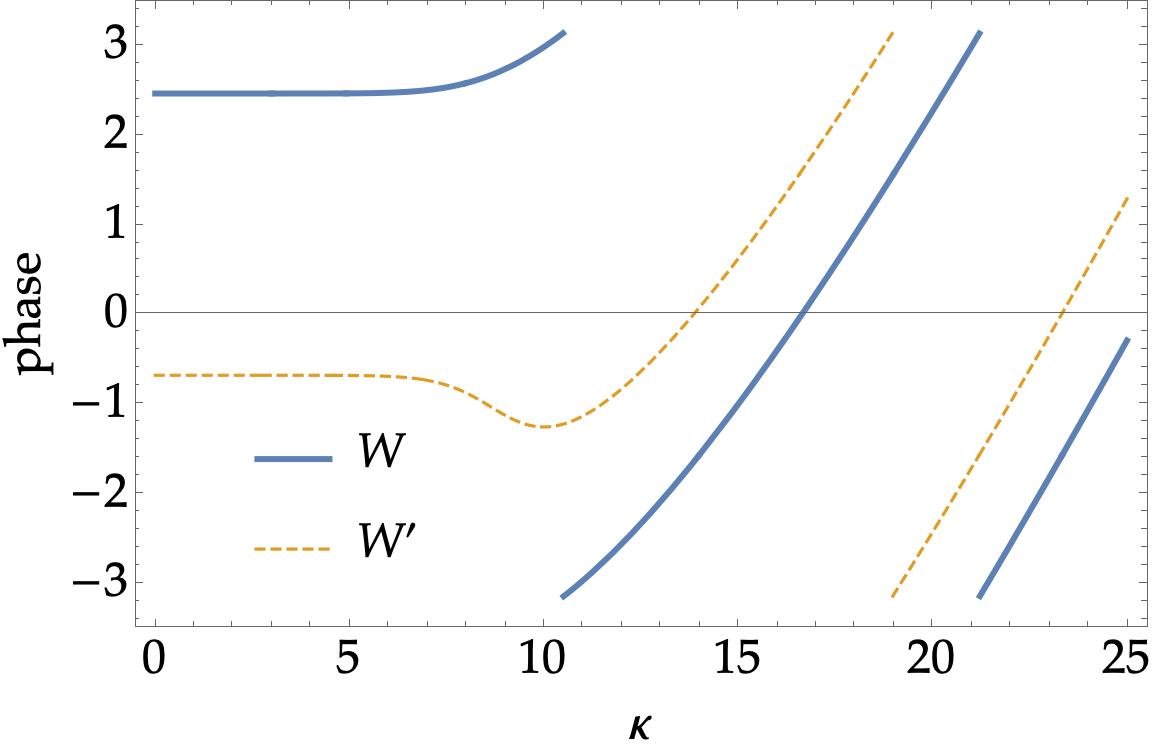

In [11]:
FigPhase =
Plot[{Arg[WW[5,kp]],Arg[Wp[5,kp]]}, {kp,0,25}, PlotRange->Full ,FrameLabel->{\[Kappa],"phase"} ,PlotLegends->Placed[{W,W'} ,{0.2,0.2}]
    ,PlotStyle->{AbsoluteThickness[3],Dashed}]

In [12]:
Export["Whittaker_phase.pdf" ,FigPhase];

In [13]:
Arg[WW[5,0.1]Conjugate[Wp[5,0.1]]]

-3.14159

In [123]:
RR[x_,kp_] = 1/Sqrt[Abs[WW[x,kp]]^2+Abs[Wp[x,kp]]^2] {{Abs[Wp[x,kp]],-Abs[WW[x,kp]]},{Abs[WW[x,kp]],Abs[Wp[x,kp]]}};
RT[x_,kp_] = Transpose[RR[x,kp]];

0.997818     0.0660282

-0.0660282   0.997818
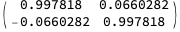

In [125]:
RT[5,0.02] // MatrixForm

In [128]:
RR[x,kp].RT[x,kp] // Simplify

{{1, 0}, {0, 1}}

In [129]:
Amp[H_,x_,kp_] = kp^2 H^2 / Sqrt[3] / (2\[Pi]) Exp[\[Pi] x/2] Sqrt[Abs[WW[x,kp]]^2+Abs[Wp[x,kp]]^2];

In [130]:
Hubble = 10^-5;
xi = 5;
kappa = 0.02;

In [134]:
proc = ItoProcess[{\[DifferentialD]Bx[t] + 2 Bx[t]\[DifferentialD]t == 
                        RT[xi,kappa][[1,2]]Amp[Hubble,xi,kappa]\[DifferentialD]wx[t],
                   \[DifferentialD]By[t] + 2 By[t]\[DifferentialD]t == 
                        RT[xi,kappa][[1,2]]Amp[Hubble,xi,kappa]\[DifferentialD]wy[t],
                   \[DifferentialD]Bz[t] + 2 Bz[t]\[DifferentialD]t == 
                        RT[xi,kappa][[1,2]]Amp[Hubble,xi,kappa]\[DifferentialD]wz[t],
                   \[DifferentialD]Ex[t] + 2 Ex[t]\[DifferentialD]t - 2xi Bx[t]\[DifferentialD]t == 
                        RT[xi,kappa][[2,2]]Amp[Hubble,xi,kappa]\[DifferentialD]wx[t],
                   \[DifferentialD]Ey[t] + 2 Ey[t]\[DifferentialD]t - 2xi By[t]\[DifferentialD]t == 
                        RT[xi,kappa][[2,2]]Amp[Hubble,xi,kappa]\[DifferentialD]wy[t],
                   \[DifferentialD]Ez[t] + 2 Ez[t]\[DifferentialD]t - 2xi Bz[t]\[DifferentialD]t == 
                        RT[xi,kappa][[2,2]]Amp[Hubble,xi,kappa]\[DifferentialD]wz[t]}, 
                   {Bx[t],By[t],Bz[t],Ex[t],Ey[t],Ez[t]}, {{Bx,By,Bz,Ex,Ey,Ez},{0,0,0,0,0,0}}, t, 
                   {wx\[Distributed]WienerProcess[], wy\[Distributed]WienerProcess[], 
                       wz\[Distributed]WienerProcess[]}];

In [135]:
Nf = 10;

In [136]:
sol = RandomFunction[proc, {0,Nf,0.01}];

In [137]:
Bsol[t_] = {sol["PathComponent",1]["PathFunction"][t], 
            sol["PathComponent",2]["PathFunction"][t],
            sol["PathComponent",3]["PathFunction"][t]};
Esol[t_] = {sol["PathComponent",4]["PathFunction"][t], 
            sol["PathComponent",5]["PathFunction"][t],
            sol["PathComponent",6]["PathFunction"][t]};

In [139]:
BAmp[t_] = Norm[Bsol[t]]^2;
NormB[t_] = Bsol[t] / Norm[Bsol[t]];
EAmp[t_] = Norm[Esol[t]]^2;
NormE[t_] = Esol[t] / Norm[Esol[t]];

In [171]:
PBB[H_,x_,kp_] = kp^4 H^4 / (4\[Pi]^2) Exp[\[Pi] x] Abs[WW[x,kp]]^2;
PEE[H_,x_,kp_] = kp^4 H^4 / (4\[Pi]^2) Exp[\[Pi] x] Abs[Wp[x,kp]]^2;
PBE[H_,x_,kp_] = kp^4 H^4 / (4\[Pi]^2) Exp[\[Pi] x] WW[x,kp] Conjugate[Wp[x,kp]];
PEB[H_,x_,kp_] = kp^4 H^4 / (4\[Pi]^2) Exp[\[Pi] x] Conjugate[WW[x,kp]] Wp[x,kp];
BvarEx[H_,x_,kp_] = 1/4 PBB[H,x,kp];
EvarEx[H_,x_,kp_] = 1/4 PEE[H,x,kp] + x/8 (PBE[H,x,kp]+PEB[H,x,kp]) + x^2/8 PBB[H,x,kp];

In [155]:
1/4 PBE[Hubble,xi,kappa] + xi/8 PBB[Hubble,xi,kappa]

-17             -29
-7.51795 10    - 1.00263 10    I

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
                                                            ~2  ~2
>       AbsoluteThickness[1.6], Dashing[{Small, Small}]]}, {B , E }, 
 
>     LegendMarkers -> None, LabelStyle -> 
 
>      Directive[GrayLevel[0], Large, FontFamily -> Palatino], LegendLayout -> Row, 
 
>     LegendMarkerSize -> 20], {0.4, 0.15}, Identity]]
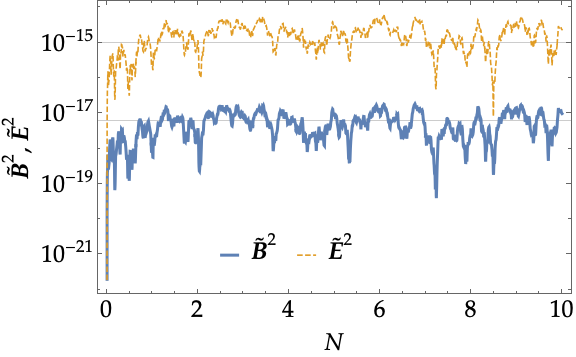

In [156]:
FigBAmpEAmp = 
    LogPlot[{BAmp[t],EAmp[t]},{t,0,Nf}, GridLines->{None,{BvarEx[Hubble,xi,kappa],Abs[EvarEx[Hubble,xi,kappa]]}},
            PlotStyle->{AbsoluteThickness[3],Dashed}, 
            FrameLabel->{N,Row[{OverTilde[Style[B,Bold]]^2, ", ", OverTilde[Style["E",Italic,Bold]]^2}]},
            PlotLegends->Placed[LineLegend[{OverTilde[Style[B,Bold]]^2, OverTilde[Style["E",Italic,Bold]]^2}, 
                                        LegendMarkerSize->20, LegendLayout->"Row"], {0.4,0.15}]]

In [75]:
Export["BAmpEAmp.pdf", FigBAmpEAmp];

Legended[-Graphics3D-, Placed[LineLegend[{Directive[RGBColor[0.368417, 0.506779, 
 
>        0.709798], AbsoluteThickness[3]], 
 
                                                                                  ^  ^
                                                                                  ~  ~
>      Directive[RGBColor[0.880722, 0.611041, 0.142051], AbsoluteThickness[3]]}, {B, E}, 
 
>     LegendMarkers -> None, LabelStyle -> 
 
>      Directive[GrayLevel[0], Large, FontFamily -> Palatino], LegendLayout -> Column], 
 
>    {0.1, 0.1}, Identity]]
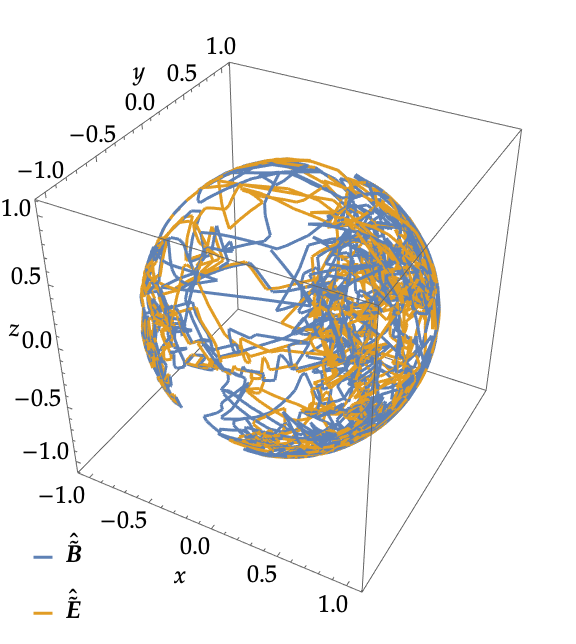

In [157]:
FigNormBNormE = ParametricPlot3D[{NormB[t],NormE[t]},{t,0,Nf}, AxesLabel->{x,y,z}, 
                            PlotLegends->Placed[{OverHat[OverTilde[Style[B,Bold]]], 
                                            OverHat[OverTilde[Style["E",Italic,Bold]]]}, {0.1,0.1}]]

Legended[-Graphics3D-, Placed[LineLegend[{Directive[RGBColor[0.368417, 0.506779, 
 
>        0.709798], AbsoluteThickness[3]], 
 
                                                                                  ^  ^
                                                                                  ~  ~
>      Directive[RGBColor[0.880722, 0.611041, 0.142051], AbsoluteThickness[3]]}, {B, E}, 
 
>     LegendMarkers -> None, LabelStyle -> 
 
>      Directive[GrayLevel[0], Large, FontFamily -> Palatino], LegendLayout -> Column], 
 
>    {0.1, 0.1}, Identity]]
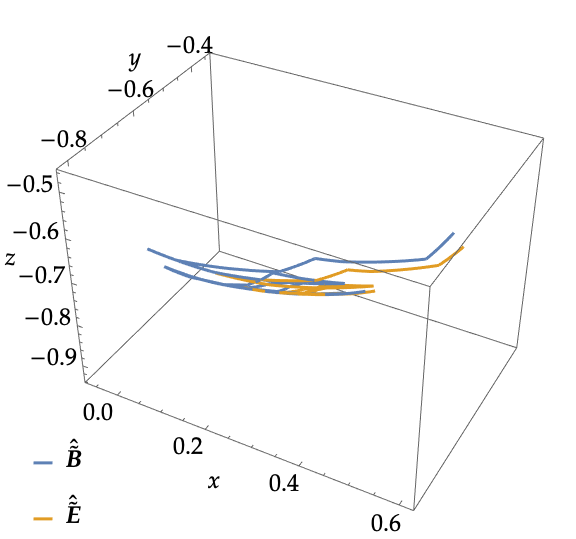

In [158]:
ParametricPlot3D[{NormB[t],NormE[t]},{t,5,5.2}, AxesLabel->{x,y,z},                             
    PlotLegends->Placed[{OverHat[OverTilde[Style[B,Bold]]], 
                            OverHat[OverTilde[Style["E",Italic,Bold]]]}, {0.1,0.1}]]

In [240]:
Export["NormBNormE.pdf", FigNormBNormE];

-Graphics-
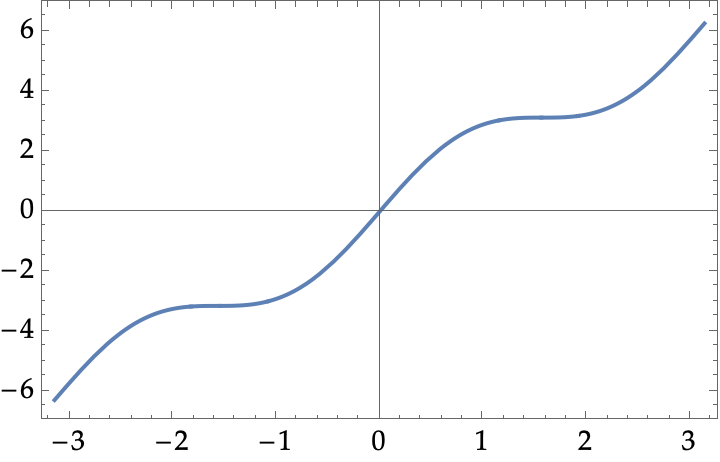

In [34]:
Plot[Sin[2x]+2x,{x,-\[Pi],\[Pi]}]

In [53]:
lambdaB[t_] = Sign[Bsol[t][[2]]]ArcCos[Bsol[t][[1]]/Sqrt[Bsol[t][[1]]^2 + Bsol[t][[2]]^2]];
phiB[t_] = ArcSin[NormB[t][[3]]];
thetaB[t_] := theta /. FindRoot[\[Pi] Sin[phiB[t]] == Sin[2theta]+2theta, {theta,0}]
MolB[t_] := {lambdaB[t]Cos[thetaB[t]], \[Pi]/2 Sin[thetaB[t]]}

-Graphics-
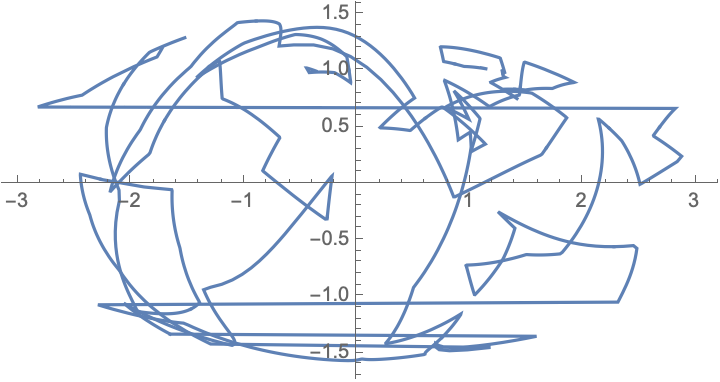

In [59]:
FigMollweide = ParametricPlot[MolB[t], {t,5,6}]

In [73]:
Export["MollWeideB.pdf", FigMollweide];

-13
-0.995124 - 1.32728 10    I
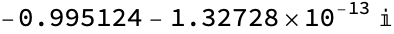

In [38]:
(1/4 PBE[Hubble,xi,kappa] + xi/8 PBB[Hubble,xi,kappa]) / Sqrt[PBB[Hubble,xi,kappa]/4] /
Sqrt[1/4 PEE[Hubble,xi,kappa] + xi/8 (PBE[Hubble,xi,kappa]+PEB[Hubble,xi,kappa] + xi^2/8 PBB[Hubble,xi,kappa])]

-16             -29
-3.60328 10    + 4.00642 10    I
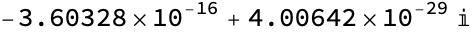

In [46]:
PEB[Hubble,xi,kappa]

Power::infy:                        1
Infinite expression -------- encountered.
                    Sqrt[0.]

Infinity::indet: Indeterminate expression 0. ComplexInfinity encountered.

Power::infy:                        1
Infinite expression -------- encountered.
                    Sqrt[0.]

Infinity::indet: Indeterminate expression 0. ComplexInfinity encountered.

Power::infy:                        1
Infinite expression -------- encountered.
                    Sqrt[0.]

Further output of `1` will be suppressed during this calculation.: Further output of Power::infy will be suppressed during this calculation.

Infinity::indet: Indeterminate expression 0. ComplexInfinity encountered.

Further output of `1` will be suppressed during this calculation.: Further output of Infinity::indet will be suppressed during this calculation.

-Graphics-
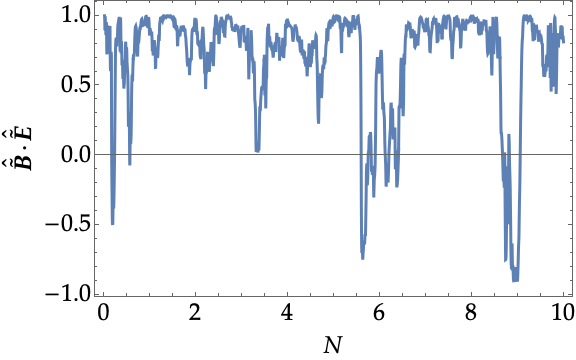

In [112]:
FigCorr = Plot[NormB[t].NormE[t],{t,0,Nf}, PlotRange->Full, 
            FrameLabel->{N,OverHat[OverTilde[Style[B,Bold]]]\[CenterDot]OverHat[OverTilde[Style["E",Italic,Bold]]]}]

In [242]:
Export["Correlation.pdf", FigCorr];